In [385]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [386]:
df = pd.read_csv('../input/suicide-predictions/suicide_new.csv')

In [387]:
df.describe()

,age,friends
count,469.000000,469.000000
mean,23.963753,7.956716
std,6.023526,34.371500
min,12.000000,0.000000
25%,20.000000,1.000000
50%,23.000000,3.000000
75%,26.000000,7.000000
max,70.000000,600.000000


In [388]:
df.columns

Index(['time', 'gender', 'sexuallity', 'age', 'income', 'race', 'bodyweight',
       'virgin', 'prostitution_legal', 'friends', 'social_fear', 'depressed',
       'what_help_from_others', 'attempt_suicide', 'employment', 'job_title',
       'edu_level', 'improve_yourself_how'],
      dtype='object')

In [389]:
type(df['time'])

pandas.core.series.Series

In [390]:
import datetime
from datetime import datetime
#df['time'] = datetime.datetime.strptime(df['time'], "%m/%d/%y %H:%M:%S"
df.drop(['time'], axis = 1, inplace = True)

In [391]:
df.head()

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


In [392]:
df.describe(include='all')

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
count,469,469,469.000000,469,469,469,469,469,469.000000,469,469,469,469,469,457,469,469
unique,4,3,NaN,13,25,4,2,2,NaN,2,2,51,2,9,275,9,62
top,Male,Straight,NaN,$0,White non-Hispanic,Normal weight,Yes,No,NaN,Yes,Yes,I don't want help,No,A student,Student,"Some college, no degree",None
freq,393,415,NaN,160,336,269,352,361,NaN,308,312,222,384,174,50,137,106
mean,NaN,NaN,23.963753,NaN,NaN,NaN,NaN,NaN,7.956716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,6.023526,NaN,NaN,NaN,NaN,NaN,34.371500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


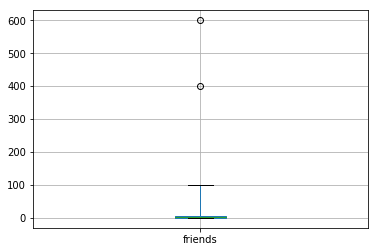

In [393]:
fig, ax = plt.subplots()
df.boxplot(column='friends', ax=ax, whis=[0.3,99.7])

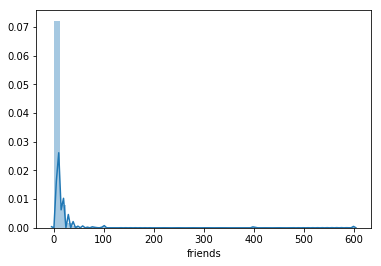

In [394]:
sns.distplot(df['friends'])

People with less friends have high chances to commit suicide

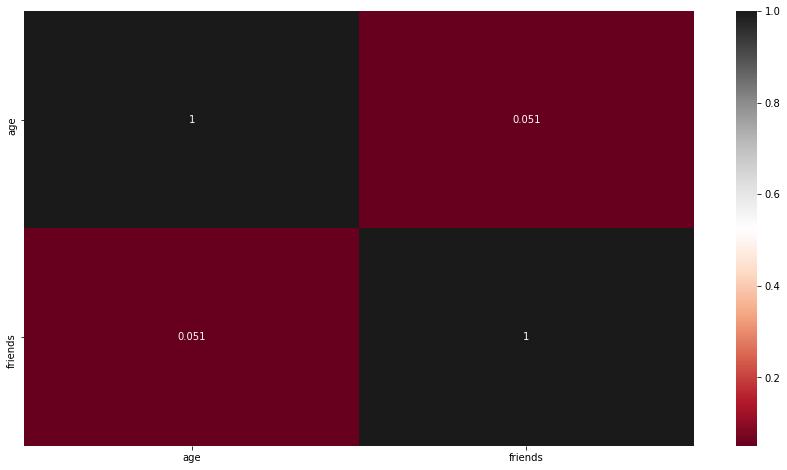

In [395]:
plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'RdGy')

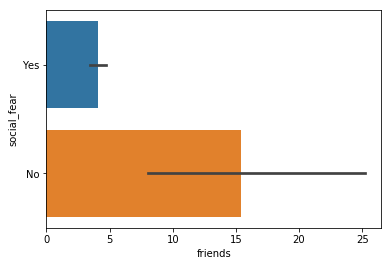

In [396]:
sns.barplot(x="friends", y="social_fear", data=df)

People with less social fear has more friends

attempt_suicide
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: friends, dtype: object

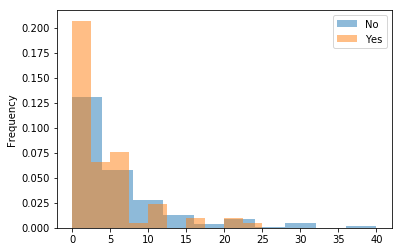

In [397]:
df.loc[df['friends'] <= 50,:] \
        .groupby('attempt_suicide')['friends'] \
        .plot.hist(legend=True, density=True, alpha = 0.5)

In [398]:
df.groupby('social_fear')['friends'].max()

social_fear
No     600.0
Yes     40.0
Name: friends, dtype: float64

In [399]:
df['improve_yourself_how'].head(10)

0                                                 None
1                     join clubs/socual clubs/meet ups
2                                       Other exercise
3                           Joined a gym/go to the gym
4                                                 None
5    Joined a gym/go to the gym, join clubs/socual ...
6                                                 None
7    Therapy, join clubs/socual clubs/meet ups, Non...
8                  Joined a gym/go to the gym, Therapy
9                                              Therapy
Name: improve_yourself_how, dtype: object

attempt_suicide
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_improves, dtype: object

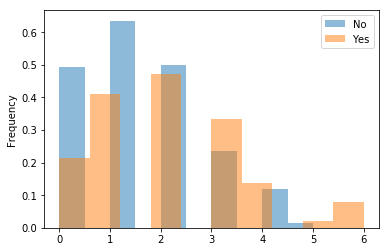

In [400]:
df['improve_yourself_how'] = df['improve_yourself_how'].str.lower()
df['total_improves'] = df['improve_yourself_how'].str.split(',').apply(lambda x: len([i for i in x if i != 'none']))
df.groupby('attempt_suicide')['total_improves'].plot.hist(legend=True, density=True, alpha = 0.5)

In [401]:
improvements = df['improve_yourself_how'].str.split(',').apply(pd.Series).stack().reset_index(drop=True)
improvements = improvements.str.strip()
unique_improvements = improvements.value_counts()
print(unique_improvements)

other exercise                                                                                                                               196
joined a gym/go to the gym                                                                                                                   192
join clubs/socual clubs/meet ups                                                                                                             143
therapy                                                                                                                                      130
none                                                                                                                                         113
cosmetic survey                                                                                                                               17
cosmetic surgery                                                                                                                  

In [402]:
print(improvements)

0                                  none
1      join clubs/socual clubs/meet ups
2                        other exercise
3            joined a gym/go to the gym
4                                  none
                     ...               
835                      other exercise
836    join clubs/socual clubs/meet ups
837          joined a gym/go to the gym
838                             therapy
839                             therapy
Length: 840, dtype: object


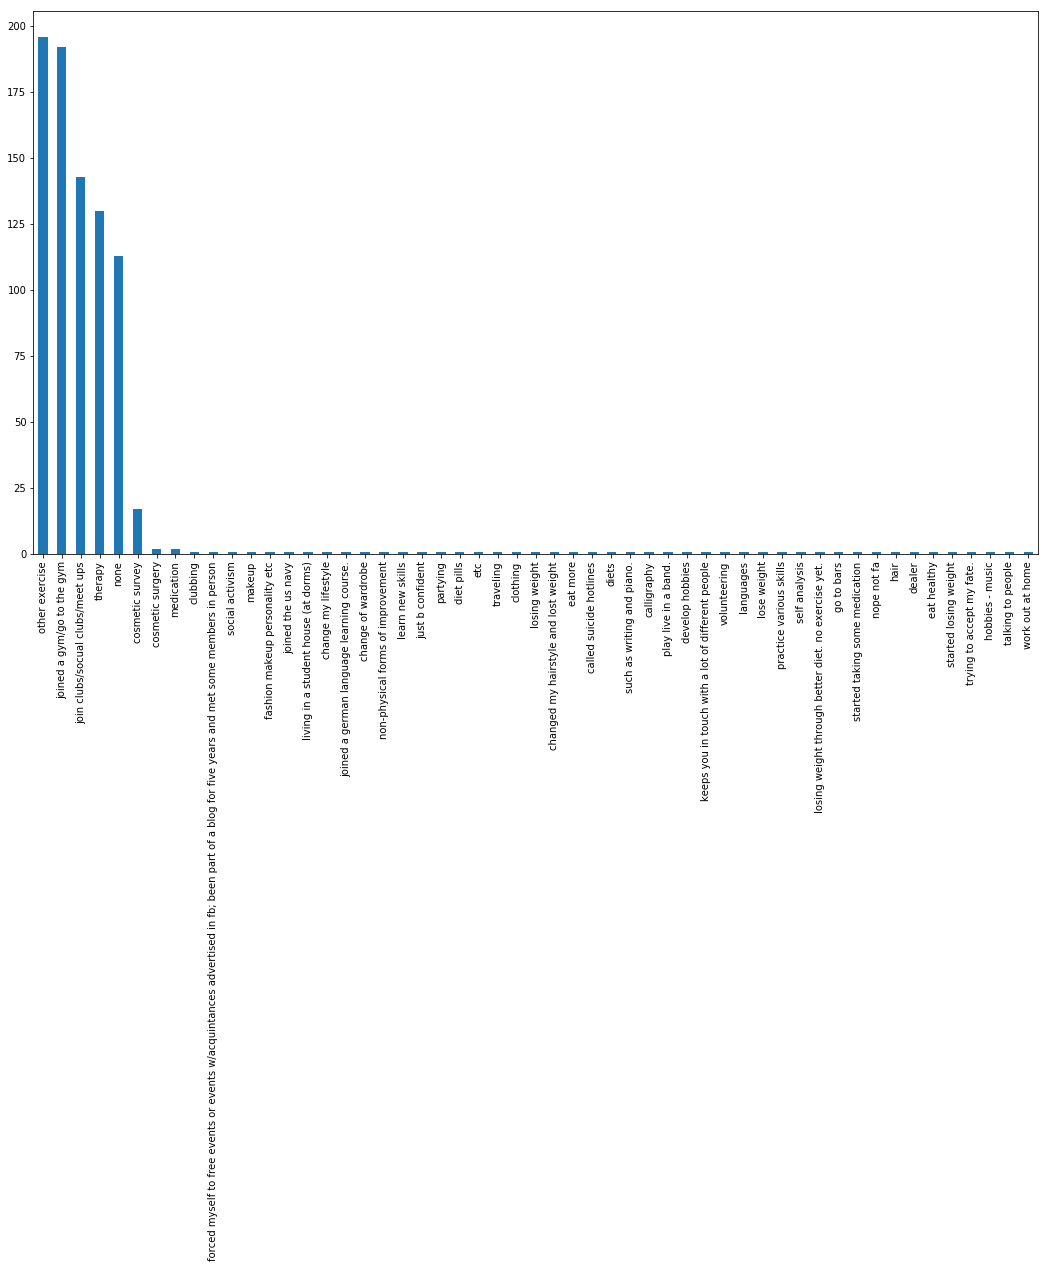

In [403]:
plt.figure(figsize = (18,10))
unique_improvements.plot(kind='bar')

In [404]:
unique_improvements = unique_improvements[unique_improvements > 10]

In [405]:
unique_improvements

other exercise                      196
joined a gym/go to the gym          192
join clubs/socual clubs/meet ups    143
therapy                             130
none                                113
cosmetic survey                      17
dtype: int64

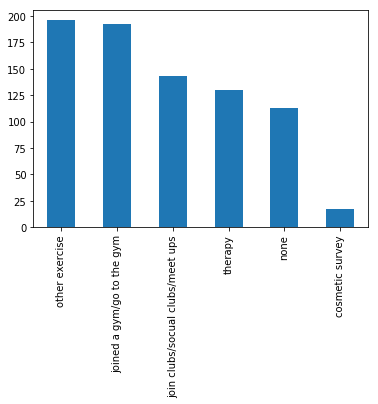

In [406]:
unique_improvements.plot(kind='bar')

In [407]:
df.head()

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how,total_improves
0,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,none,0
1,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups,1
2,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",other exercise,1
3,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",joined a gym/go to the gym,1
4,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",none,0


In [408]:
df['dep_num'] = df['depressed'].map(lambda x : 1 if x == 'Yes' else 0)
df['sui_num'] = df['attempt_suicide'].map(lambda x : 1 if x == 'Yes' else 0)

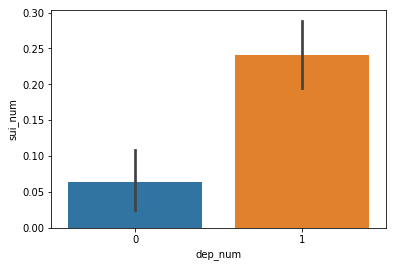

In [409]:
sns.barplot(x='dep_num', y='sui_num', data=df)

It is obvious that depressed people tend to suicide

**Feature Engineering**

Adding a column for each of the unique improvements

In [410]:
for i in unique_improvements.index:
    df['[improve] {}'.format(i)] = df['improve_yourself_how'].str.contains(i, regex=False)

In [411]:
df.head(15)

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,friends,social_fear,...,improve_yourself_how,total_improves,dep_num,sui_num,[improve] other exercise,[improve] joined a gym/go to the gym,[improve] join clubs/socual clubs/meet ups,[improve] therapy,[improve] none,[improve] cosmetic survey
0,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,0.0,Yes,...,none,0,1,1,False,False,False,False,True,False
1,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,0.0,Yes,...,join clubs/socual clubs/meet ups,1,1,0,False,False,True,False,False,False
2,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,10.0,Yes,...,other exercise,1,1,0,True,False,False,False,False,False
3,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,8.0,Yes,...,joined a gym/go to the gym,1,1,0,False,True,False,False,False,False
4,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,10.0,No,...,none,0,1,0,False,False,False,False,True,False
5,Male,Straight,24,"$50,000 to $74,999",White non-Hispanic,Normal weight,Yes,No,2.0,Yes,...,"joined a gym/go to the gym, join clubs/socual ...",2,1,1,False,True,True,False,False,False
6,Male,Straight,22,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,2.0,Yes,...,none,0,1,0,False,False,False,False,True,False
7,Female,Gay/Lesbian,24,"$20,000 to $29,999",White non-Hispanic,Normal weight,Yes,No,10.0,Yes,...,"therapy, join clubs/socual clubs/meet ups, non...",6,1,1,False,False,True,True,True,False
8,Male,Straight,20,"$10,000 to $19,999",White non-Hispanic,Overweight,Yes,No,0.0,Yes,...,"joined a gym/go to the gym, therapy",2,1,0,False,True,False,True,False,False
9,Male,Straight,33,"$50,000 to $74,999",White non-Hispanic,Overweight,No,No,6.0,Yes,...,therapy,1,1,1,False,False,False,True,False,False


In [412]:
col = {x:'sum' for x in df.columns if '[improve]' in x}
df.groupby('attempt_suicide').agg(col).apply(lambda x: x/x.sum(), axis=1)

,[improve] other exercise,[improve] joined a gym/go to the gym,[improve] join clubs/socual clubs/meet ups,[improve] therapy,[improve] none,[improve] cosmetic survey
attempt_suicide,,,,,,
No,0.246774,0.251613,0.182258,0.140323,0.158065,0.020968
Yes,0.251462,0.210526,0.175439,0.251462,0.087719,0.023392


In [413]:
df.what_help_from_others

0               wingman/wingwoman, Set me up with a date
1      wingman/wingwoman, Set me up with a date, date...
2                                      I don't want help
3                                          date coaching
4                                      I don't want help
                             ...                        
464                 Set me up with a date, date coaching
465                                    I don't want help
466                                    wingman/wingwoman
467                                Set me up with a date
468    wingman/wingwoman, Set me up with a date, date...
Name: what_help_from_others, Length: 469, dtype: object

attempt_suicide
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_help, dtype: object

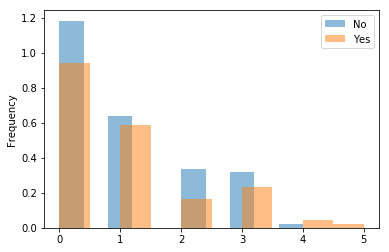

In [414]:
df['what_help_from_others'] = df['what_help_from_others'].str.lower()
df['total_help'] = df['what_help_from_others'].str.split(',').apply(lambda x: len([i for i in x if i != "i don't want help"]))
df.groupby('attempt_suicide')['total_help'].plot.hist(legend=True, density=True, alpha = 0.5)

In [415]:
help_from_others = df['what_help_from_others'].str.split(',').apply(pd.Series).stack().reset_index(drop=True)
help_from_others = help_from_others.str.strip()

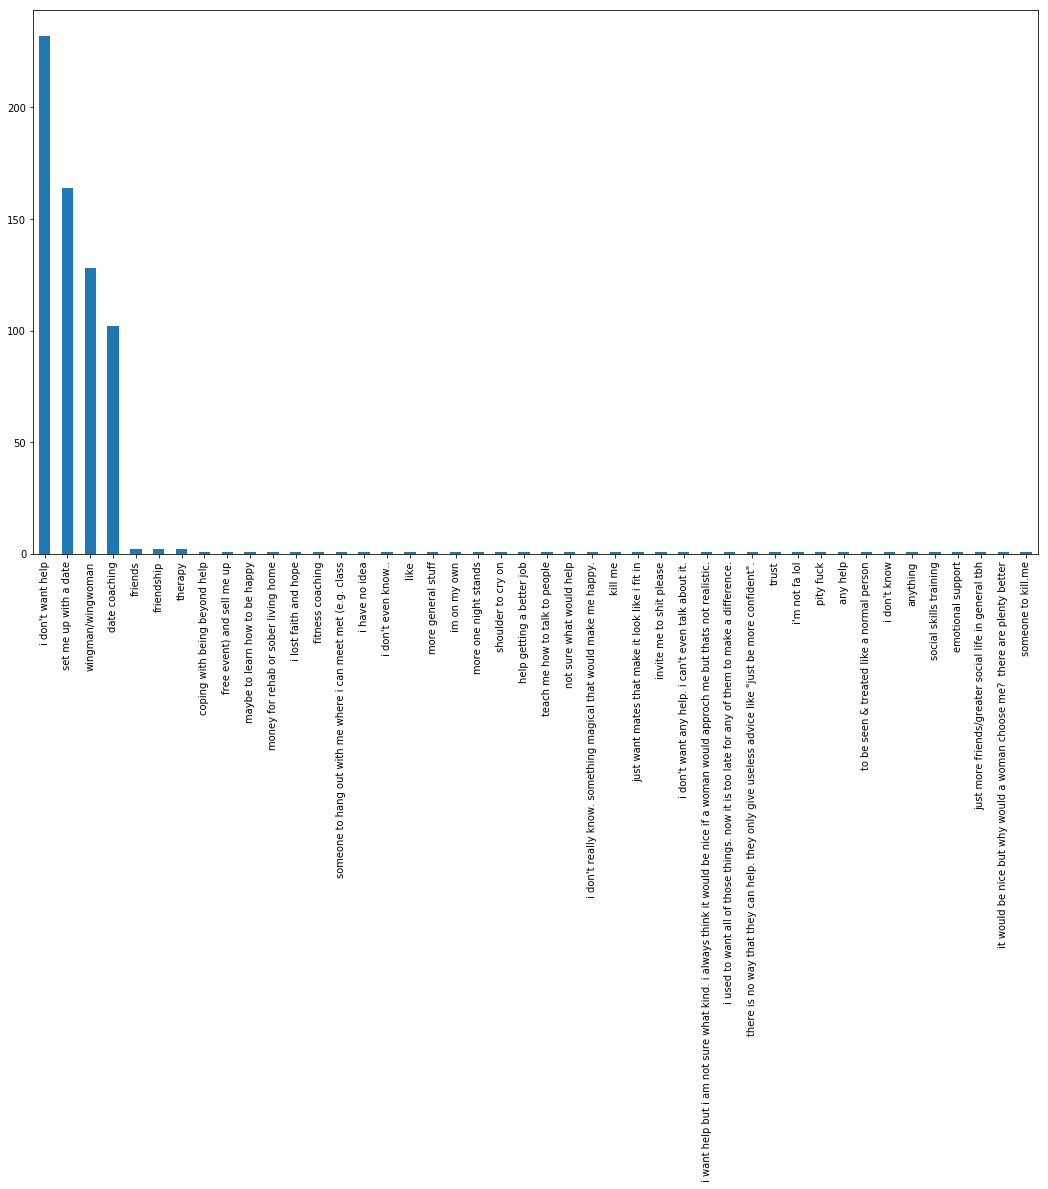

In [416]:
unique_help_from_others = help_from_others.value_counts()
plt.figure(figsize = (18,10))
unique_help_from_others.plot(kind='bar')

In [417]:
unique_help_from_others

i don't want help                                                                                                                232
set me up with a date                                                                                                            164
wingman/wingwoman                                                                                                                128
date coaching                                                                                                                    102
friends                                                                                                                            2
friendship                                                                                                                         2
therapy                                                                                                                            2
coping with being beyond help                                        

In [418]:
unique_help_from_others = unique_help_from_others[unique_help_from_others > 100]

In [419]:
unique_help_from_others

i don't want help        232
set me up with a date    164
wingman/wingwoman        128
date coaching            102
dtype: int64

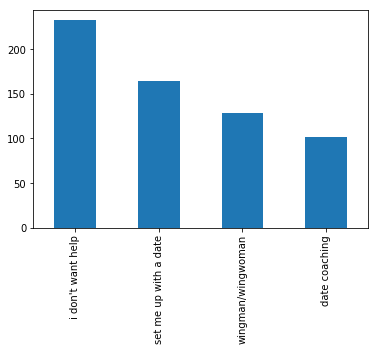

In [420]:
unique_help_from_others.plot(kind='bar')

In [421]:
for i in unique_help_from_others.index:
    df['[help] {}'.format(i)] = df['what_help_from_others'].str.contains(i, regex=False)

In [422]:
df

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,friends,social_fear,...,[improve] joined a gym/go to the gym,[improve] join clubs/socual clubs/meet ups,[improve] therapy,[improve] none,[improve] cosmetic survey,total_help,[help] i don't want help,[help] set me up with a date,[help] wingman/wingwoman,[help] date coaching
0,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,0.0,Yes,...,False,False,False,True,False,2,False,True,True,False
1,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,0.0,Yes,...,False,True,False,False,False,3,False,True,True,True
2,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,10.0,Yes,...,False,False,False,False,False,0,True,False,False,False
3,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,8.0,Yes,...,True,False,False,False,False,1,False,False,False,True
4,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,10.0,No,...,False,False,False,True,False,0,True,False,False,False
5,Male,Straight,24,"$50,000 to $74,999",White non-Hispanic,Normal weight,Yes,No,2.0,Yes,...,True,True,False,False,False,1,False,False,False,True
6,Male,Straight,22,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,2.0,Yes,...,False,False,False,True,False,2,False,True,False,True
7,Female,Gay/Lesbian,24,"$20,000 to $29,999",White non-Hispanic,Normal weight,Yes,No,10.0,Yes,...,False,True,True,True,False,2,False,False,True,True
8,Male,Straight,20,"$10,000 to $19,999",White non-Hispanic,Overweight,Yes,No,0.0,Yes,...,True,False,True,False,False,1,False,True,False,False
9,Male,Straight,33,"$50,000 to $74,999",White non-Hispanic,Overweight,No,No,6.0,Yes,...,False,False,True,False,False,1,False,True,False,False


In [423]:
col = {x:'sum' for x in df.columns if '[help]' in x}
df.groupby('attempt_suicide').agg(col).apply(lambda x: x/x.sum(), axis=1)

,[help] i don't want help,[help] set me up with a date,[help] wingman/wingwoman,[help] date coaching
attempt_suicide,,,,
No,0.366089,0.269750,0.206166,0.157996
Yes,0.392523,0.224299,0.196262,0.186916


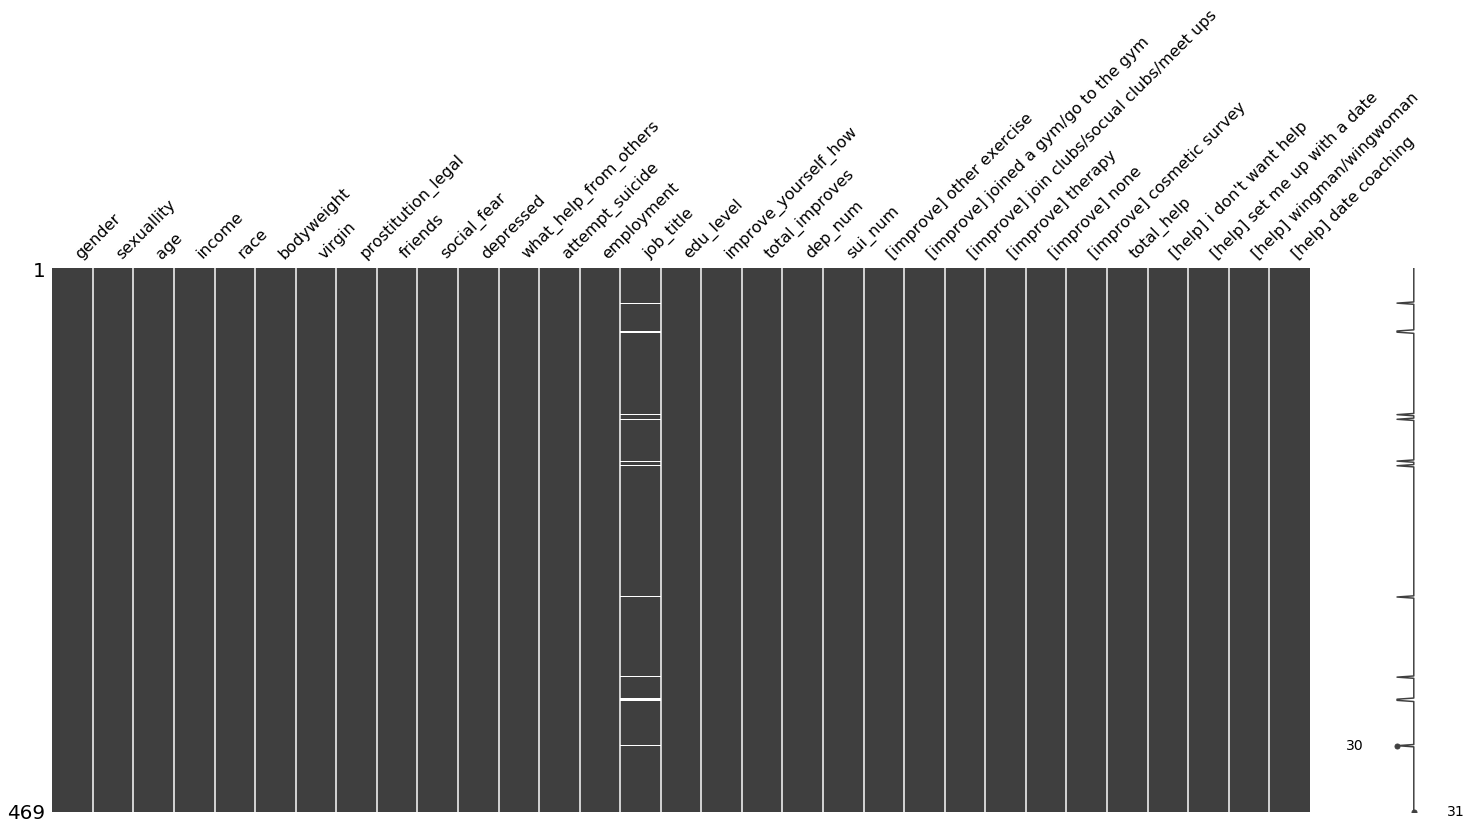

In [424]:
import missingno as mn
mn.matrix(df)

We can see that Job Title has some missing values, so we need to classify the job titles

In [425]:
df.job_title

0      mechanical drafter
1                       -
2              unemployed
3                 student
4          Factory worker
              ...        
464         Consultant IT
465                castor
466         receptionist 
467               Student
468             Scientist
Name: job_title, Length: 469, dtype: object

In [426]:
job_df = df.loc[:,('job_title', 'employment', 'edu_level')].applymap(lambda x: x.strip().lower() if type(x) == str else x)
job_df[pd.isna(job_df['job_title'])]

,job_title,employment,edu_level
30,NaN,a student,"some high school, no diploma"
54,NaN,a student,"high school graduate, diploma or the equivalen..."
55,NaN,out of work but not currently looking for work,"some college, no degree"
126,NaN,out of work but not currently looking for work,"some college, no degree"
130,NaN,out of work but not currently looking for work,"some college, no degree"
166,NaN,out of work but not currently looking for work,"some college, no degree"
170,NaN,out of work but not currently looking for work,associate degree
283,NaN,a student,"some college, no degree"
352,NaN,out of work and looking for work,"high school graduate, diploma or the equivalen..."
371,NaN,a student,"some high school, no diploma"


In [427]:
job_df['job_title'].value_counts()

student                     82
none                        31
unemployed                  15
engineer                    12
software engineer            7
                            ..
freight associate            1
kitchen staff                1
system analyst associate     1
what?                        1
none (?)                     1
Name: job_title, Length: 241, dtype: int64

In [428]:
df.drop(['job_title', 'edu_level'], axis = 1, inplace = True)

In [429]:
df.describe()

,age,friends,total_improves,dep_num,sui_num,total_help
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,23.963753,7.956716,1.562900,0.665245,0.181237,0.944563
std,6.023526,34.371500,1.273828,0.472409,0.385625,1.109938
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,23.000000,3.000000,1.000000,1.000000,0.000000,1.000000
75%,26.000000,7.000000,2.000000,1.000000,0.000000,2.000000
max,70.000000,600.000000,6.000000,1.000000,1.000000,5.000000


In [430]:
df.columns


Index(['gender', 'sexuallity', 'age', 'income', 'race', 'bodyweight', 'virgin',
       'prostitution_legal', 'friends', 'social_fear', 'depressed',
       'what_help_from_others', 'attempt_suicide', 'employment',
       'improve_yourself_how', 'total_improves', 'dep_num', 'sui_num',
       '[improve] other exercise', '[improve] joined a gym/go to the gym',
       '[improve] join clubs/socual clubs/meet ups', '[improve] therapy',
       '[improve] none', '[improve] cosmetic survey', 'total_help',
       '[help] i don't want help', '[help] set me up with a date',
       '[help] wingman/wingwoman', '[help] date coaching'],
      dtype='object')

In [431]:
df['gender'] = df['gender'].map(lambda x : 1 if len(x)<=5 else 0)

In [432]:
df['gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

In [433]:
df.head()

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,friends,social_fear,...,[improve] joined a gym/go to the gym,[improve] join clubs/socual clubs/meet ups,[improve] therapy,[improve] none,[improve] cosmetic survey,total_help,[help] i don't want help,[help] set me up with a date,[help] wingman/wingwoman,[help] date coaching
0,1,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,0.0,Yes,...,False,False,False,True,False,2,False,True,True,False
1,1,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,0.0,Yes,...,False,True,False,False,False,3,False,True,True,True
2,1,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,10.0,Yes,...,False,False,False,False,False,0,True,False,False,False
3,1,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,8.0,Yes,...,True,False,False,False,False,1,False,False,False,True
4,1,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,10.0,No,...,False,False,False,True,False,0,True,False,False,False


In [434]:
df['sexuallity'].value_counts()

Straight       415
Bisexual        46
Gay/Lesbian      8
Name: sexuallity, dtype: int64

In [435]:
df['sexuallity'][df['sexuallity'] == 'Straight'] = 0
df['sexuallity'][df['sexuallity'] == 'Bisexual'] = 1
df['sexuallity'][df['sexuallity'] == 'Gay/Lesbian'] = 2

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

In [436]:
df['sexuallity']

0      0
1      1
2      0
3      0
4      0
      ..
464    0
465    0
466    0
467    0
468    0
Name: sexuallity, Length: 469, dtype: object

In [437]:
def agegroup(age):
    a = ''
    if(age <= 1):
        a = 'infant'
    elif(age <= 4):
        a = 'baby'
    elif(age <= 12):
        a = 'child'
    elif(age <= 19):
        a = 'teenager'
    elif(age <= 28):
        a = 'young adult'
    elif(age <= 40):
        a = 'adult'
    elif(age <= 58):
        a = 'middle_age'
    else:
        a = 'old'
    return a
        

In [438]:
df['age'] = df['age'].map(agegroup)

In [439]:
df['age'].value_counts()

young adult    295
teenager        94
adult           70
middle_age       7
child            2
old              1
Name: age, dtype: int64

In [440]:
df = pd.get_dummies(df, columns = ['age'])

In [441]:
df.head(10)


,gender,sexuallity,income,race,bodyweight,virgin,prostitution_legal,friends,social_fear,depressed,...,[help] i don't want help,[help] set me up with a date,[help] wingman/wingwoman,[help] date coaching,age_adult,age_child,age_middle_age,age_old,age_teenager,age_young adult
0,1,0,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,0.0,Yes,Yes,...,False,True,True,False,1,0,0,0,0,0
1,1,1,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,0.0,Yes,Yes,...,False,True,True,True,0,0,0,0,0,1
2,1,0,$0,White non-Hispanic,Overweight,Yes,No,10.0,Yes,Yes,...,True,False,False,False,0,0,0,0,0,1
3,1,0,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,8.0,Yes,Yes,...,False,False,False,True,0,0,0,0,1,0
4,1,0,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,10.0,No,Yes,...,True,False,False,False,0,0,0,0,0,1
5,1,0,"$50,000 to $74,999",White non-Hispanic,Normal weight,Yes,No,2.0,Yes,Yes,...,False,False,False,True,0,0,0,0,0,1
6,1,0,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,2.0,Yes,Yes,...,False,True,False,True,0,0,0,0,0,1
7,0,2,"$20,000 to $29,999",White non-Hispanic,Normal weight,Yes,No,10.0,Yes,Yes,...,False,False,True,True,0,0,0,0,0,1
8,1,0,"$10,000 to $19,999",White non-Hispanic,Overweight,Yes,No,0.0,Yes,Yes,...,False,True,False,False,0,0,0,0,0,1
9,1,0,"$50,000 to $74,999",White non-Hispanic,Overweight,No,No,6.0,Yes,Yes,...,False,True,False,False,1,0,0,0,0,0


In [442]:
df['bodyweight'].value_counts()

Normal weight    269
Overweight       113
Underweight       62
Obese             25
Name: bodyweight, dtype: int64

In [443]:
df = pd.get_dummies(df, columns = ['bodyweight'])

In [444]:
df.head(10)

,gender,sexuallity,income,race,virgin,prostitution_legal,friends,social_fear,depressed,what_help_from_others,...,age_adult,age_child,age_middle_age,age_old,age_teenager,age_young adult,bodyweight_Normal weight,bodyweight_Obese,bodyweight_Overweight,bodyweight_Underweight
0,1,0,"$30,000 to $39,999",White non-Hispanic,Yes,No,0.0,Yes,Yes,"wingman/wingwoman, set me up with a date",...,1,0,0,0,0,0,1,0,0,0
1,1,1,"$1 to $10,000",White non-Hispanic,Yes,No,0.0,Yes,Yes,"wingman/wingwoman, set me up with a date, date...",...,0,0,0,0,0,1,0,0,0,1
2,1,0,$0,White non-Hispanic,Yes,No,10.0,Yes,Yes,i don't want help,...,0,0,0,0,0,1,0,0,1,0
3,1,0,"$1 to $10,000",White non-Hispanic,Yes,Yes,8.0,Yes,Yes,date coaching,...,0,0,0,0,1,0,0,0,1,0
4,1,0,"$30,000 to $39,999",White non-Hispanic,No,No,10.0,No,Yes,i don't want help,...,0,0,0,0,0,1,0,0,1,0
5,1,0,"$50,000 to $74,999",White non-Hispanic,Yes,No,2.0,Yes,Yes,date coaching,...,0,0,0,0,0,1,1,0,0,0
6,1,0,"$1 to $10,000",White non-Hispanic,Yes,No,2.0,Yes,Yes,"set me up with a date, date coaching",...,0,0,0,0,0,1,0,0,0,1
7,0,2,"$20,000 to $29,999",White non-Hispanic,Yes,No,10.0,Yes,Yes,"wingman/wingwoman, date coaching",...,0,0,0,0,0,1,1,0,0,0
8,1,0,"$10,000 to $19,999",White non-Hispanic,Yes,No,0.0,Yes,Yes,set me up with a date,...,0,0,0,0,0,1,0,0,1,0
9,1,0,"$50,000 to $74,999",White non-Hispanic,No,No,6.0,Yes,Yes,set me up with a date,...,1,0,0,0,0,0,0,0,1,0


In [445]:
df.columns

Index(['gender', 'sexuallity', 'income', 'race', 'virgin',
       'prostitution_legal', 'friends', 'social_fear', 'depressed',
       'what_help_from_others', 'attempt_suicide', 'employment',
       'improve_yourself_how', 'total_improves', 'dep_num', 'sui_num',
       '[improve] other exercise', '[improve] joined a gym/go to the gym',
       '[improve] join clubs/socual clubs/meet ups', '[improve] therapy',
       '[improve] none', '[improve] cosmetic survey', 'total_help',
       '[help] i don't want help', '[help] set me up with a date',
       '[help] wingman/wingwoman', '[help] date coaching', 'age_adult',
       'age_child', 'age_middle_age', 'age_old', 'age_teenager',
       'age_young adult', 'bodyweight_Normal weight', 'bodyweight_Obese',
       'bodyweight_Overweight', 'bodyweight_Underweight'],
      dtype='object')

In [446]:
df.drop(['improve_yourself_how','what_help_from_others','dep_num','sui_num'], axis = 1, inplace = True)

In [447]:
df.columns

Index(['gender', 'sexuallity', 'income', 'race', 'virgin',
       'prostitution_legal', 'friends', 'social_fear', 'depressed',
       'attempt_suicide', 'employment', 'total_improves',
       '[improve] other exercise', '[improve] joined a gym/go to the gym',
       '[improve] join clubs/socual clubs/meet ups', '[improve] therapy',
       '[improve] none', '[improve] cosmetic survey', 'total_help',
       '[help] i don't want help', '[help] set me up with a date',
       '[help] wingman/wingwoman', '[help] date coaching', 'age_adult',
       'age_child', 'age_middle_age', 'age_old', 'age_teenager',
       'age_young adult', 'bodyweight_Normal weight', 'bodyweight_Obese',
       'bodyweight_Overweight', 'bodyweight_Underweight'],
      dtype='object')

In [448]:
df.head()

,gender,sexuallity,income,race,virgin,prostitution_legal,friends,social_fear,depressed,attempt_suicide,...,age_adult,age_child,age_middle_age,age_old,age_teenager,age_young adult,bodyweight_Normal weight,bodyweight_Obese,bodyweight_Overweight,bodyweight_Underweight
0,1,0,"$30,000 to $39,999",White non-Hispanic,Yes,No,0.0,Yes,Yes,Yes,...,1,0,0,0,0,0,1,0,0,0
1,1,1,"$1 to $10,000",White non-Hispanic,Yes,No,0.0,Yes,Yes,No,...,0,0,0,0,0,1,0,0,0,1
2,1,0,$0,White non-Hispanic,Yes,No,10.0,Yes,Yes,No,...,0,0,0,0,0,1,0,0,1,0
3,1,0,"$1 to $10,000",White non-Hispanic,Yes,Yes,8.0,Yes,Yes,No,...,0,0,0,0,1,0,0,0,1,0
4,1,0,"$30,000 to $39,999",White non-Hispanic,No,No,10.0,No,Yes,No,...,0,0,0,0,0,1,0,0,1,0


In [449]:
df.drop(['prostitution_legal'], axis = 1, inplace = True)

In [450]:
df.head()

,gender,sexuallity,income,race,virgin,friends,social_fear,depressed,attempt_suicide,employment,...,age_adult,age_child,age_middle_age,age_old,age_teenager,age_young adult,bodyweight_Normal weight,bodyweight_Obese,bodyweight_Overweight,bodyweight_Underweight
0,1,0,"$30,000 to $39,999",White non-Hispanic,Yes,0.0,Yes,Yes,Yes,Employed for wages,...,1,0,0,0,0,0,1,0,0,0
1,1,1,"$1 to $10,000",White non-Hispanic,Yes,0.0,Yes,Yes,No,Out of work and looking for work,...,0,0,0,0,0,1,0,0,0,1
2,1,0,$0,White non-Hispanic,Yes,10.0,Yes,Yes,No,Out of work but not currently looking for work,...,0,0,0,0,0,1,0,0,1,0
3,1,0,"$1 to $10,000",White non-Hispanic,Yes,8.0,Yes,Yes,No,A student,...,0,0,0,0,1,0,0,0,1,0
4,1,0,"$30,000 to $39,999",White non-Hispanic,No,10.0,No,Yes,No,Employed for wages,...,0,0,0,0,0,1,0,0,1,0


In [451]:
df['income'].value_counts()

$0                      160
$1 to $10,000           100
$10,000 to $19,999       58
$20,000 to $29,999       44
$30,000 to $39,999       39
$50,000 to $74,999       28
$40,000 to $49,999       16
$75,000 to $99,999        9
$125,000 to $149,999      6
$100,000 to $124,999      3
$174,999 to $199,999      2
$200,000 or more          2
$150,000 to $174,999      2
Name: income, dtype: int64

In [452]:
def income_group(age):
    a = ''
    if(age == "$0"):
        a = '1'
    elif(age == "$1 to $10,000"):
        a = '2'
    elif(age == "$10,000 to $19,999"):
        a = '3'
    elif(age == "$20,000 to $29,999"):
        a = '4'
    elif(age == "$30,000 to $39,999"):
        a = '5'
    elif(age == "$50,000 to $74,999"):
        a = '6'
    elif(age == "$40,000 to $49,999"):
        a = '7'
    elif(age == "$75,000 to $99,999"):
        a = '8'
    elif(age == "$125,000 to $149,999"):
        a = '9'
    elif(age == "$100,000 to $124,999"):
        a = '10'
    elif(age == "$174,999 to $199,999"):
        a = '11'
    elif(age == "$200,000 or more"):
        a = '12'
    else:
        a = '13'
    return a

In [453]:
df['income'] = df['income'].map(income_group)

In [454]:
df['income'].value_counts()

1     160
2     100
3      58
4      44
5      39
6      28
7      16
8       9
9       6
10      3
12      2
13      2
11      2
Name: income, dtype: int64

In [455]:
df.head()

,gender,sexuallity,income,race,virgin,friends,social_fear,depressed,attempt_suicide,employment,...,age_adult,age_child,age_middle_age,age_old,age_teenager,age_young adult,bodyweight_Normal weight,bodyweight_Obese,bodyweight_Overweight,bodyweight_Underweight
0,1,0,5,White non-Hispanic,Yes,0.0,Yes,Yes,Yes,Employed for wages,...,1,0,0,0,0,0,1,0,0,0
1,1,1,2,White non-Hispanic,Yes,0.0,Yes,Yes,No,Out of work and looking for work,...,0,0,0,0,0,1,0,0,0,1
2,1,0,1,White non-Hispanic,Yes,10.0,Yes,Yes,No,Out of work but not currently looking for work,...,0,0,0,0,0,1,0,0,1,0
3,1,0,2,White non-Hispanic,Yes,8.0,Yes,Yes,No,A student,...,0,0,0,0,1,0,0,0,1,0
4,1,0,5,White non-Hispanic,No,10.0,No,Yes,No,Employed for wages,...,0,0,0,0,0,1,0,0,1,0


In [456]:
df.drop(['race'], axis = 1, inplace = True)

In [457]:
df.head()

,gender,sexuallity,income,virgin,friends,social_fear,depressed,attempt_suicide,employment,total_improves,...,age_adult,age_child,age_middle_age,age_old,age_teenager,age_young adult,bodyweight_Normal weight,bodyweight_Obese,bodyweight_Overweight,bodyweight_Underweight
0,1,0,5,Yes,0.0,Yes,Yes,Yes,Employed for wages,0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,2,Yes,0.0,Yes,Yes,No,Out of work and looking for work,1,...,0,0,0,0,0,1,0,0,0,1
2,1,0,1,Yes,10.0,Yes,Yes,No,Out of work but not currently looking for work,1,...,0,0,0,0,0,1,0,0,1,0
3,1,0,2,Yes,8.0,Yes,Yes,No,A student,1,...,0,0,0,0,1,0,0,0,1,0
4,1,0,5,No,10.0,No,Yes,No,Employed for wages,0,...,0,0,0,0,0,1,0,0,1,0


In [458]:
df['virgin'] = df['virgin'].map(lambda x: 1 if x=='Yes' else 0)

In [459]:
df['social_fear'] = df['social_fear'].map(lambda x: 1 if x=='Yes' else 0)
df['depressed'] = df['depressed'].map(lambda x: 1 if x=='Yes' else 0)
df['attempt_suicide'] = df['attempt_suicide'].map(lambda x: 1 if x=='Yes' else 0)

In [460]:
df.head()

,gender,sexuallity,income,virgin,friends,social_fear,depressed,attempt_suicide,employment,total_improves,...,age_adult,age_child,age_middle_age,age_old,age_teenager,age_young adult,bodyweight_Normal weight,bodyweight_Obese,bodyweight_Overweight,bodyweight_Underweight
0,1,0,5,1,0.0,1,1,1,Employed for wages,0,...,1,0,0,0,0,0,1,0,0,0
1,1,1,2,1,0.0,1,1,0,Out of work and looking for work,1,...,0,0,0,0,0,1,0,0,0,1
2,1,0,1,1,10.0,1,1,0,Out of work but not currently looking for work,1,...,0,0,0,0,0,1,0,0,1,0
3,1,0,2,1,8.0,1,1,0,A student,1,...,0,0,0,0,1,0,0,0,1,0
4,1,0,5,0,10.0,0,1,0,Employed for wages,0,...,0,0,0,0,0,1,0,0,1,0


In [461]:
df['employment'].value_counts()

A student                                         174
Employed for wages                                171
Out of work but not currently looking for work     40
Out of work and looking for work                   38
Self-employed                                      22
Unable to work                                     13
Military                                            5
Retired                                             3
A homemaker                                         3
Name: employment, dtype: int64

In [462]:
def emp(e):
    a = ''
    if(e == "A student"):
        a='0'
    elif(e == "Employed for wages"):
        a='1'
    elif(e == "Out of work but not currently looking for work"):
        a='2'
    elif(e == "Out of work and looking for work"):
        a='3'
    elif(e == "Self-employed"):
        a='4'
    elif(e == "Unable to work"):
        a='5'
    else:
        a='6'
    return a
        

In [463]:
df['employment'] = df['employment'].map(emp)

In [464]:
df = pd.get_dummies(df, columns = ['employment'])

In [465]:
df.drop(['total_improves'], axis = 1, inplace = True)

In [466]:
df.head()

,gender,sexuallity,income,virgin,friends,social_fear,depressed,attempt_suicide,[improve] other exercise,[improve] joined a gym/go to the gym,...,bodyweight_Obese,bodyweight_Overweight,bodyweight_Underweight,employment_0,employment_1,employment_2,employment_3,employment_4,employment_5,employment_6
0,1,0,5,1,0.0,1,1,1,False,False,...,0,0,0,0,1,0,0,0,0,0
1,1,1,2,1,0.0,1,1,0,False,False,...,0,0,1,0,0,0,1,0,0,0
2,1,0,1,1,10.0,1,1,0,True,False,...,0,1,0,0,0,1,0,0,0,0
3,1,0,2,1,8.0,1,1,0,False,True,...,0,1,0,1,0,0,0,0,0,0
4,1,0,5,0,10.0,0,1,0,False,False,...,0,1,0,0,1,0,0,0,0,0


In [467]:
df.columns

Index(['gender', 'sexuallity', 'income', 'virgin', 'friends', 'social_fear',
       'depressed', 'attempt_suicide', '[improve] other exercise',
       '[improve] joined a gym/go to the gym',
       '[improve] join clubs/socual clubs/meet ups', '[improve] therapy',
       '[improve] none', '[improve] cosmetic survey', 'total_help',
       '[help] i don't want help', '[help] set me up with a date',
       '[help] wingman/wingwoman', '[help] date coaching', 'age_adult',
       'age_child', 'age_middle_age', 'age_old', 'age_teenager',
       'age_young adult', 'bodyweight_Normal weight', 'bodyweight_Obese',
       'bodyweight_Overweight', 'bodyweight_Underweight', 'employment_0',
       'employment_1', 'employment_2', 'employment_3', 'employment_4',
       'employment_5', 'employment_6'],
      dtype='object')

In [468]:
df.drop(['total_help'], axis = 1, inplace = True)

In [469]:
df['[improve] other exercise'] = df['[improve] other exercise'].map(lambda x: 1 if x=='Yes' else 0)
df['[improve] joined a gym/go to the gym'] = df['[improve] joined a gym/go to the gym'].map(lambda x: 1 if x=='Yes' else 0)
df['[improve] join clubs/socual clubs/meet ups'] = df['[improve] join clubs/socual clubs/meet ups'].map(lambda x: 1 if x=='Yes' else 0)
df['[improve] therapy'] = df['[improve] therapy'].map(lambda x: 1 if x=='Yes' else 0)
df['[improve] none'] = df['[improve] none'].map(lambda x: 1 if x=='Yes' else 0)
df['[improve] cosmetic survey'] = df['[improve] cosmetic survey'].map(lambda x: 1 if x=='Yes' else 0)
df["[help] i don't want help"] = df["[help] i don't want help"].map(lambda x: 1 if x=='Yes' else 0)
df['[help] set me up with a date'] = df['[help] set me up with a date'].map(lambda x: 1 if x=='Yes' else 0)
df['[help] wingman/wingwoman'] = df['[help] wingman/wingwoman'].map(lambda x: 1 if x=='Yes' else 0)
df['[help] date coaching'] = df['[help] date coaching'].map(lambda x: 1 if x=='Yes' else 0)

In [470]:
df.head()

,gender,sexuallity,income,virgin,friends,social_fear,depressed,attempt_suicide,[improve] other exercise,[improve] joined a gym/go to the gym,...,bodyweight_Obese,bodyweight_Overweight,bodyweight_Underweight,employment_0,employment_1,employment_2,employment_3,employment_4,employment_5,employment_6
0,1,0,5,1,0.0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,2,1,0.0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,0,1,1,10.0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,0,2,1,8.0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,1,0,5,0,10.0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [471]:
df.describe()

,gender,virgin,friends,social_fear,depressed,attempt_suicide,[improve] other exercise,[improve] joined a gym/go to the gym,[improve] join clubs/socual clubs/meet ups,[improve] therapy,...,bodyweight_Obese,bodyweight_Overweight,bodyweight_Underweight,employment_0,employment_1,employment_2,employment_3,employment_4,employment_5,employment_6
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.0,469.0,469.0,469.0,...,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000
mean,0.837953,0.750533,7.956716,0.656716,0.665245,0.181237,0.0,0.0,0.0,0.0,...,0.053305,0.240938,0.132196,0.371002,0.364606,0.085288,0.081023,0.046908,0.027719,0.023454
std,0.368887,0.433167,34.371500,0.475312,0.472409,0.385625,0.0,0.0,0.0,0.0,...,0.224881,0.428110,0.339066,0.483589,0.481833,0.279608,0.273163,0.211668,0.164341,0.151502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,7.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,600.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [472]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [474]:
from sklearn.model_selection import train_test_split
x = df.drop(['attempt_suicide'], axis=1)
y = df['attempt_suicide']

In [475]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [480]:
yTrain

102    1
55     0
164    0
301    0
438    0
      ..
323    0
192    0
117    0
47     0
172    0
Name: attempt_suicide, Length: 375, dtype: int64

In [481]:
df.columns

Index(['gender', 'sexuallity', 'income', 'virgin', 'friends', 'social_fear',
       'depressed', 'attempt_suicide', '[improve] other exercise',
       '[improve] joined a gym/go to the gym',
       '[improve] join clubs/socual clubs/meet ups', '[improve] therapy',
       '[improve] none', '[improve] cosmetic survey',
       '[help] i don't want help', '[help] set me up with a date',
       '[help] wingman/wingwoman', '[help] date coaching', 'age_adult',
       'age_child', 'age_middle_age', 'age_old', 'age_teenager',
       'age_young adult', 'bodyweight_Normal weight', 'bodyweight_Obese',
       'bodyweight_Overweight', 'bodyweight_Underweight', 'employment_0',
       'employment_1', 'employment_2', 'employment_3', 'employment_4',
       'employment_5', 'employment_6'],
      dtype='object')

In [483]:
lr = LogisticRegression(random_state = 0)
lr.fit(xTrain, yTrain)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [485]:
yPreds_lr = lr.predict(xTest)


In [488]:
from sklearn.metrics import accuracy_score
print(accuracy_score(yPreds_lr,yTest)*100)

85.1063829787234


In [490]:
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(xTrain, yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [493]:
yPreds_dtc = dtc.predict(xTest)
print(accuracy_score(yPreds_dtc,yTest)*100)

70.2127659574468


In [495]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(xTrain, yTrain)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [496]:
yPreds_rfc = rfc.predict(xTest)
print(accuracy_score(yPreds_rfc,yTest)*100)

84.04255319148936


In [498]:
svc = SVC(random_state = 0)
svc.fit(xTrain, yTrain)
yPreds_svc = svc.predict(xTest)
print(accuracy_score(yPreds_svc,yTest)*100)

85.1063829787234


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [499]:
df.columns

Index(['gender', 'sexuallity', 'income', 'virgin', 'friends', 'social_fear',
       'depressed', 'attempt_suicide', '[improve] other exercise',
       '[improve] joined a gym/go to the gym',
       '[improve] join clubs/socual clubs/meet ups', '[improve] therapy',
       '[improve] none', '[improve] cosmetic survey',
       '[help] i don't want help', '[help] set me up with a date',
       '[help] wingman/wingwoman', '[help] date coaching', 'age_adult',
       'age_child', 'age_middle_age', 'age_old', 'age_teenager',
       'age_young adult', 'bodyweight_Normal weight', 'bodyweight_Obese',
       'bodyweight_Overweight', 'bodyweight_Underweight', 'employment_0',
       'employment_1', 'employment_2', 'employment_3', 'employment_4',
       'employment_5', 'employment_6'],
      dtype='object')

In [501]:
import nbformat
from nbconvert import PythonExporter

def convertNotebook(notebookPath, modulePath):

    # citation
    # https://stackoverflow.com/questions/17077494/
    # how-do-i-convert-a-ipython-notebook-into-a-python-file-via-commandline/40100393#40100393

    with open(notebookPath) as fh:
        nb = nbformat.reads(fh.read(), nbformat.NO_CONVERT)

    exporter = PythonExporter()
    source, meta = exporter.from_notebook_node(nb)

    with open(modulePath, 'w+') as fh:
        fh.writelines(source) 

%notebook -e foo.ipynb

convertNotebook("foo.ipynb", "foo.py")

!cat foo.py

#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')


# In[2]:


df = pd.read_csv('../input/suicide-predictions/suicide_new.csv')


# In[3]:


df.describe()


# In[4]:


df.columns


# In[5]:


type(df['time'])


# In[6]:


import datetime
from datetime import datetime
#df['time'] = datetime.datetime.strptime(df['time'], "%m/%d/%y %H:%M:%S"
df.drop(['time'], axis = 1, inplace = True)


# In[7]:


df.head()


# In[8]:


df.describe(include='all')


# In[9]:


fig, ax = plt.subplots()
df.boxplot(column='friends', ax=ax, whis=[0.3,99.7])


# In[10]:


sns.distplot(df['friends'])


# In[11]:


plt.subplots(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'RdGy')


# In[12]:


sns.barplot(x="friends", y="social_fear", data=df)


# In[13]:


df.loc[df['friends'] <= 50,:]         .groupby('attempt_suicide')['friends']         .plot.hist(l